# Movies API 

<img src="imgs/movies.jpg">

# Required Libraries

In [1]:
import requests
import urllib
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Methods to be used

In [2]:
def print_movie_meta(response, atr_lst=["title","tagline","popularity","budget","revenue","runtime", "vote_average"]):
    """ Prints out parameters from response given in atr_lst
    """
    for atrib in atr_lst:
        if atrib in response:
            print("{}: {}\n".format(atrib.upper(), response[atrib]))
        else:
            print("{}: {}\n".format(atrib.upper(), "NO DATA"))
            
def search_movies(query):
    """ Returns response for specified textual query
    """
    global API_KEY
    params = {
        "api_key":API_KEY,
        "query": query,
        "language":"en",
        "include_adult":"false",
        "page":1
    }
    print(params)
    response = requests.request("GET",gateway+"search/movie", data=params).json()['results']
    return response 

def get_movie_by_id(movie_id):
    """ Returns movie with given id
    """
    global API_KEY
    return requests.get(gateway+"movie/{}?api_key={}".format(movie_id, API_KEY)).json()

def get_similar_movies(query):
    """ Returns data frame of similar movies with movie ids and titles
    """
    response = search_movies(query)
    print("Fetched ID's! \n")
    movies = []
    for movie in response:
    #     print(movie["id"])
        r = get_movie_by_id(movie["id"])
        print("Movie with ID:{} fetched!".format(r["id"]))
        movie = [r["id"], r["title"]]
        movies.append(movie)
    df = pd.DataFrame(movies)
    df.columns = ["ID", "TITLE"]
    return df 

def return_genres():
    """ Returns list of genres
    """
    r = \
    requests.get(" https://api.themoviedb.org/3/genre/movie/list?api_key={}&langua \
    ge=en-US".format(API_KEY)).json()
    return pd.DataFrame([i for i in r["genres"]])

def get_number_of_movies_per_genre(iid):
    global API_KEY
    url = "https://api.themoviedb.org/3/genre/{}/movies?api_key={}& \
    language=en-US&include_adult=false".format(str(iid), API_KEY)
    return requests.get(url).json()['total_results']

def get_genre_popularity(df):
    """ Adds number of movies to gender data frame
    """
    df["movies_count"] = df["id"].apply(lambda x: get_number_of_movies_per_genre(x))
    return df

def get_top_movies(sort_by, value):
    """ Returns response for specified textual query
    """
    global API_KEY
    params = {
        "api_key":API_KEY,
        "sort_by": "{}.desc".format(sort_by),
        "language":"en",
        "include_adult":"false",
        "page":1
    }
    print(params)
    response = requests.request("GET",gateway+"discover/movie", data=params).json()["results"]
    movies = []
    for i in response:
        movies.append([i["title"], i[value]])
    df = pd.DataFrame(movies)
    df.columns = ["title", value]
    sns.barplot(df[value], df["title"])

## What is an API?

<img src="imgs/api.png">

## Gateway and API KEY

In [3]:
gateway = "https://api.themoviedb.org/3/"

In [4]:
API_KEY = "85360a9a66ef1390085061c341f5cf15"

## Example API query

In [5]:
requests.get(gateway+"movie/76341?api_key={}&language=en".format(API_KEY)).json()

{'adult': False,
 'backdrop_path': '/phszHPFVhPHhMZgo0fWTKBDQsJA.jpg',
 'belongs_to_collection': {'backdrop_path': '/zI0q2ENcQOLECbe0gAEGlncVh2j.jpg',
  'id': 8945,
  'name': 'Mad Max Collection',
  'poster_path': '/jZowUf4okNYuSlgj5iURE7CDMho.jpg'},
 'budget': 150000000,
 'genres': [{'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'},
  {'id': 878, 'name': 'Science Fiction'},
  {'id': 53, 'name': 'Thriller'}],
 'homepage': 'http://www.madmaxmovie.com/',
 'id': 76341,
 'imdb_id': 'tt1392190',
 'original_language': 'en',
 'original_title': 'Mad Max: Fury Road',
 'overview': "An apocalyptic story set in the furthest reaches of our planet, in a stark desert landscape where humanity is broken, and most everyone is crazed fighting for the necessities of life. Within this world exist two rebels on the run who just might be able to restore order. There's Max, a man of action and a man of few words, who seeks peace of mind following the loss of his wife and child in the aftermath o

### Let's make this prettier

In [6]:
response = requests.get(gateway+"movie/76341?api_key={}&language=en".format(API_KEY)).json()

In [7]:
print_movie_meta(response, ["title", "tagline", "popularity","budget","revenue","runtime", "vote_average"])

TITLE: Mad Max: Fury Road

TAGLINE: What a Lovely Day.

POPULARITY: 55.150404

BUDGET: 150000000

REVENUE: 378858340

RUNTIME: 120

VOTE_AVERAGE: 7.3



## Let's find our favourite movie

In [8]:
response = search_movies("Harry Potter")

{'api_key': '85360a9a66ef1390085061c341f5cf15', 'query': 'Harry Potter', 'language': 'en', 'include_adult': 'false', 'page': 1}


Sometimes we will get more than one result, so we need to specify which do we want, like:
* response[0] - first result
* response[1] - second result

In [9]:
print_movie_meta(response[3], ["title", "popularity","vote_average"])

TITLE: Harry Potter and the Half-Blood Prince

POPULARITY: 24.590426

VOTE_AVERAGE: 7.5



# Let's find similar movies

In [10]:
similar_movies = get_similar_movies("Spiderman")

{'api_key': '85360a9a66ef1390085061c341f5cf15', 'query': 'Spiderman', 'language': 'en', 'include_adult': 'false', 'page': 1}
Fetched ID's! 

Movie with ID:557 fetched!
Movie with ID:315635 fetched!
Movie with ID:559 fetched!
Movie with ID:1930 fetched!
Movie with ID:68658 fetched!
Movie with ID:558 fetched!
Movie with ID:102382 fetched!
Movie with ID:112679 fetched!
Movie with ID:181508 fetched!
Movie with ID:49131 fetched!
Movie with ID:228088 fetched!
Movie with ID:148918 fetched!
Movie with ID:429617 fetched!
Movie with ID:445033 fetched!
Movie with ID:324857 fetched!
Movie with ID:172799 fetched!
Movie with ID:225925 fetched!
Movie with ID:270768 fetched!
Movie with ID:225914 fetched!
Movie with ID:50410 fetched!


In [11]:
similar_movies

,ID,TITLE
0,557,Spider-Man
1,315635,Spider-Man: Homecoming
2,559,Spider-Man 3
3,1930,The Amazing Spider-Man
4,68658,Spiderman
5,558,Spider-Man 2
6,102382,The Amazing Spider-Man 2
7,112679,Italian Spiderman
8,181508,Spider-Man Tech
9,49131,Spiderman: The Ultimate Villain Showdown


## Let's get more details per ID

In [12]:
response = get_movie_by_id(557)
print_movie_meta(response)

TITLE: Spider-Man

TAGLINE: With great power comes great responsibility.

POPULARITY: 34.141267

BUDGET: 139000000

REVENUE: 821708551

RUNTIME: 121

VOTE_AVERAGE: 6.9



# What are the movie Genres?

In [13]:
genres = return_genres()

In [14]:
genres

,id,name
0,28,Action
1,12,Adventure
2,16,Animation
3,35,Comedy
4,80,Crime
5,99,Documentary
6,18,Drama
7,10751,Family
8,14,Fantasy
9,36,History


# Which is the most common genre? 

In [15]:
genres = get_genre_popularity(genres)

In [16]:
genres

,id,name,movies_count
0,28,Action,21586
1,12,Adventure,11364
2,16,Animation,14995
3,35,Comedy,58487
4,80,Crime,14952
5,99,Documentary,37949
6,18,Drama,85979
7,10751,Family,11866
8,14,Fantasy,7789
9,36,History,5333


## Let's plot this

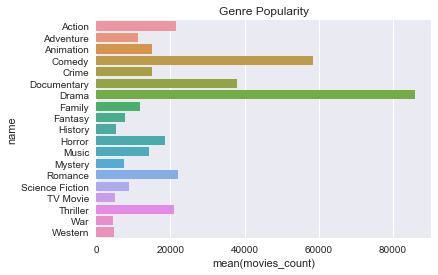

In [17]:
sns.barplot(genres["movies_count"], genres["name"])
plt.title("Genre Popularity")

# Let's get most popular movies!

{'api_key': '85360a9a66ef1390085061c341f5cf15', 'sort_by': 'popularity.desc', 'language': 'en', 'include_adult': 'false', 'page': 1}


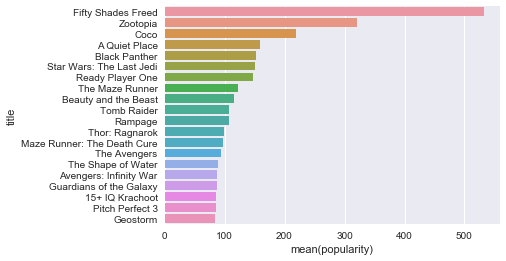

In [18]:
get_top_movies("popularity", "popularity")

# Popularity of movies with highest Revenue

{'api_key': '85360a9a66ef1390085061c341f5cf15', 'sort_by': 'revenue.desc', 'language': 'en', 'include_adult': 'false', 'page': 1}


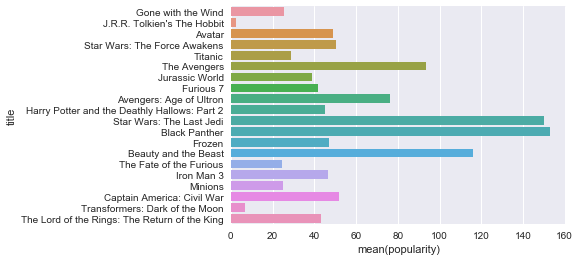

In [19]:
get_top_movies("revenue", "popularity")